In [51]:
from sklearn.model_selection import train_test_split
from sklearn import svm
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

#data = [open, high, low, close, volume USD, EMA difference], most recent entries first
data_newest = np.loadtxt(open("data/Bitstamp_Minutely.csv", "rb"), delimiter=",", skiprows=2, usecols=(3,4,5,6,8))

#oldest entries first data
X = data_newest[::-1]

def get_EMA(x, short=9, long=26, column=0):
    EMA = np.zeros((len(x),3))     #Returns EMA matrix with entires: [short period EMA, long period EMA, difference]
    
    #** REFER TO ABOVE MARKDOWN CELL
    EMA[long-1][0] = np.sum(x[long-short:long])/short   #These are SMAs used for the intial EMA calculation
    EMA[long-1][1] = np.sum(x[0:long])/long             #These are SMAs used for the intial EMA calculation

    #calculate EMA:
    w0 = 2/(1+short)   #short period weights
    w1 = 2/(1+long)    #long period weights
    for i in range(long, len(x)):
        EMA[i][0] = x[i]*w0 + EMA[i-1][0]*(1-w0)    #short term EMA 
        EMA[i][1] = x[i]*w1 + EMA[i-1][1]*(1-w1)    #long term EMA 
        EMA[i][2] = EMA[i][0]-EMA[i][1]
    return EMA

def attach_column(M, c):
    if M.shape[0] != len(c):
        print("Error: Cannot attach column to matrix with different sizes")
        return
    M = np.insert(M, M.shape[1], c, axis=1)
    return M

EMA = get_EMA(X[:,0])

X = attach_column(X, EMA[:,2])
X = X[27:]
y = np.zeros(X.shape[0])
for i in range(len(X)-15):
    y[i] = np.sign(np.average(X[i:i+5,0])-X[i][0])
    
scalar = MinMaxScaler()
X = scalar.fit_transform(X)

In [122]:
model = svm.SVC(C=100, kernel='rbf')
model.fit(X[30000:32000], y[30000:32000])
accuracy = model.score(X[32000:32180],y[32000:32180])
yhat = model.predict(X[32000:32180])
print(accuracy)
CF = metrics.confusion_matrix(y[32000:32180], yhat)
print(CF)

0.7111111111111111
[[84  8]
 [44 44]]


In [135]:
r = np.random.randint(low=0, high=180000)  #random start
X_train, X_test, y_train, y_test = train_test_split(X[r:r+2180], y[r:r+2180], test_size=180)
model2 = svm.SVC(C=100, kernel='rbf')
model2.fit(X_train, y_train)
accuracy = model2.score(X_test, y_test)
yhat = model2.predict(X_test)
CF = metrics.confusion_matrix(y_test, yhat)
print("f1: ", metrics.f1_score(y_test, yhat))
print(CF)

f1:  0.7403314917127073
[[66 28]
 [19 67]]


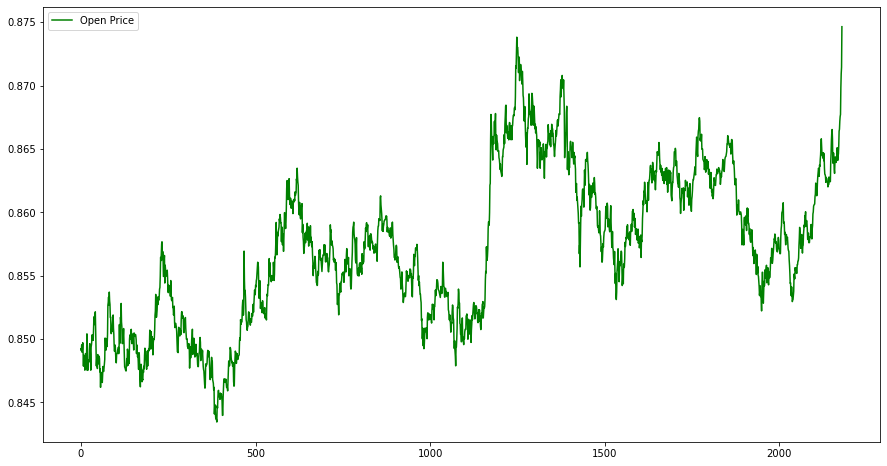

In [80]:
time = r
plt.figure(figsize = (15,8))
plt.plot(X[time:time+2180,0], color='green')
plt.legend(["Open Price"])
plt.show()

In [108]:
r = np.random.randint(low=0, high=180000)  #random start
X_train, X_test, y_train, y_test = train_test_split(X[r:r+360], y[r:r+360], test_size=180)
model2 = svm.SVC(C=100, kernel='rbf')
model2.fit(X_train, y_train)
accuracy = model2.score(X_test, y_test)
yhat = model2.predict(X_test)
CF = metrics.confusion_matrix(y_test, yhat)
print("f1: ", metrics.f1_score(y_test, yhat))
print(CF)

f1:  0.3050847457627119
[[80 10]
 [72 18]]
